# Redes Neurais - Conceitos Básicos

Nessa aula, iremos tratar dos seguintes conteúdos:
- Introdução a Redes Neurais;
- Componentes de uma Rede Neural;
- Aplicações de Redes Neurais;
- Quando utilizar Redes Neurais?;
- Diferenças entre Redes Neurais e _Deep Learning_;
- Modelando uma Rede Neural - Perceptron;
- Implementação em Python;
- Exercícios.

## 

## Exercícios - Gabarito

__1)__ Aplique o _Perceptron_ no _dataset_ `iris` e classifique utilizando a Rede Neural entre flores que são da espécie `virginica` e `versicolor`(mantenha só estas espécies no conjunto de dados). O modelo consegue determinar a região de separação? Para isso façam 3 testes:

- utilizando apenas as variáveis `sepal_length` e `petal_length`;

- utilizando apenas as variáveis `sepal_width` e `petal_width`;

- Utilizando todas as variáveis disponíveis (__Obs.:__ Neste caso para tentar visualizar a região de separação será necessário realizar uma redução de dimensionalidade).

In [1]:
# Principais bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregando os dados do seaborn
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris = iris[iris['species'] != 'setosa']
iris

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# Criando a target
y = iris['species'].values
y = np.where(y == 'virginica', 1, -1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

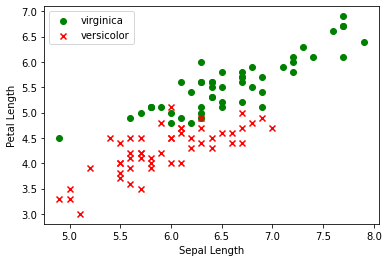

In [5]:
# Plot dos dados utilizando apenas a sepal_legnth, petal_length
plt.scatter(iris[iris['species'] == 'virginica']['sepal_length'], 
            iris[iris['species'] == 'virginica']['petal_length'],
            color = 'green',
            marker = 'o',
            label = 'virginica')

plt.scatter(iris[iris['species'] == 'versicolor']['sepal_length'], 
            iris[iris['species'] == 'versicolor']['petal_length'],
            color = 'red',
            marker = 'x',
            label = 'versicolor')

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

plt.legend()
plt.show()

In [6]:
# Separando só as duas variaveis para o modelo
X = iris[['sepal_length', 'petal_length']].values
X

array([[7. , 4.7],
       [6.4, 4.5],
       [6.9, 4.9],
       [5.5, 4. ],
       [6.5, 4.6],
       [5.7, 4.5],
       [6.3, 4.7],
       [4.9, 3.3],
       [6.6, 4.6],
       [5.2, 3.9],
       [5. , 3.5],
       [5.9, 4.2],
       [6. , 4. ],
       [6.1, 4.7],
       [5.6, 3.6],
       [6.7, 4.4],
       [5.6, 4.5],
       [5.8, 4.1],
       [6.2, 4.5],
       [5.6, 3.9],
       [5.9, 4.8],
       [6.1, 4. ],
       [6.3, 4.9],
       [6.1, 4.7],
       [6.4, 4.3],
       [6.6, 4.4],
       [6.8, 4.8],
       [6.7, 5. ],
       [6. , 4.5],
       [5.7, 3.5],
       [5.5, 3.8],
       [5.5, 3.7],
       [5.8, 3.9],
       [6. , 5.1],
       [5.4, 4.5],
       [6. , 4.5],
       [6.7, 4.7],
       [6.3, 4.4],
       [5.6, 4.1],
       [5.5, 4. ],
       [5.5, 4.4],
       [6.1, 4.6],
       [5.8, 4. ],
       [5. , 3.3],
       [5.6, 4.2],
       [5.7, 4.2],
       [5.7, 4.2],
       [6.2, 4.3],
       [5.1, 3. ],
       [5.7, 4.1],
       [6.3, 6. ],
       [5.8, 5.1],
       [7.1,

In [7]:
from sklearn.linear_model import Perceptron

In [8]:
# instancia o modelo
model = Perceptron()

In [9]:
model.fit(X, y)

Perceptron()

In [10]:
# Carrega a função plot_decision_regions
from mlxtend.plotting import plot_decision_regions

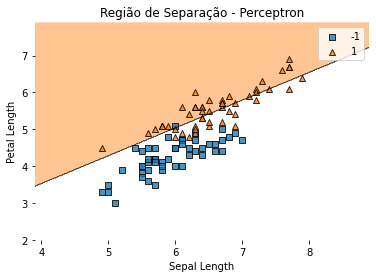

In [11]:
# Plot da região de separação
plot_decision_regions(X, 
                      y, 
                      clf = model, 
                      legend = 2)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Região de Separação - Perceptron')
plt.legend()
plt.show()

Usando só as larguras de pétala e sépala:

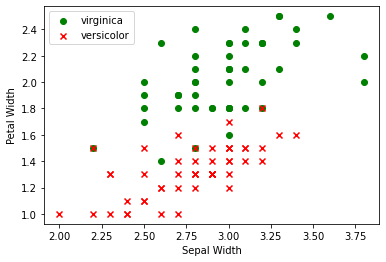

In [12]:
# Plot dos dados utilizando apenas a sepal_legnth, petal_length
plt.scatter(iris[iris['species'] == 'virginica']['sepal_width'], 
            iris[iris['species'] == 'virginica']['petal_width'],
            color = 'green',
            marker = 'o',
            label = 'virginica')

plt.scatter(iris[iris['species'] == 'versicolor']['sepal_width'], 
            iris[iris['species'] == 'versicolor']['petal_width'],
            color = 'red',
            marker = 'x',
            label = 'versicolor')

plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

plt.legend()
plt.show()

In [13]:
# Separando só as duas variaveis para o modelo
X = iris[['sepal_width', 'petal_width']].values
X

array([[3.2, 1.4],
       [3.2, 1.5],
       [3.1, 1.5],
       [2.3, 1.3],
       [2.8, 1.5],
       [2.8, 1.3],
       [3.3, 1.6],
       [2.4, 1. ],
       [2.9, 1.3],
       [2.7, 1.4],
       [2. , 1. ],
       [3. , 1.5],
       [2.2, 1. ],
       [2.9, 1.4],
       [2.9, 1.3],
       [3.1, 1.4],
       [3. , 1.5],
       [2.7, 1. ],
       [2.2, 1.5],
       [2.5, 1.1],
       [3.2, 1.8],
       [2.8, 1.3],
       [2.5, 1.5],
       [2.8, 1.2],
       [2.9, 1.3],
       [3. , 1.4],
       [2.8, 1.4],
       [3. , 1.7],
       [2.9, 1.5],
       [2.6, 1. ],
       [2.4, 1.1],
       [2.4, 1. ],
       [2.7, 1.2],
       [2.7, 1.6],
       [3. , 1.5],
       [3.4, 1.6],
       [3.1, 1.5],
       [2.3, 1.3],
       [3. , 1.3],
       [2.5, 1.3],
       [2.6, 1.2],
       [3. , 1.4],
       [2.6, 1.2],
       [2.3, 1. ],
       [2.7, 1.3],
       [3. , 1.2],
       [2.9, 1.3],
       [2.9, 1.3],
       [2.5, 1.1],
       [2.8, 1.3],
       [3.3, 2.5],
       [2.7, 1.9],
       [3. ,

In [14]:
model.fit(X, y)

Perceptron()

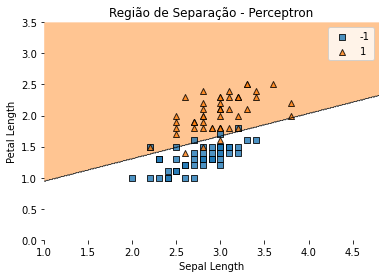

In [15]:
# Plot da região de separação
plot_decision_regions(X, 
                      y, 
                      clf = model, 
                      legend = 2)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Região de Separação - Perceptron')
plt.legend()
plt.show()

Usando todas as features:

In [16]:
# Separando só as duas variaveis para o modelo
X = iris.drop(['species'], axis = 1).values
X

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [6.6, 2.9, 4.6, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 2. , 3.5, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [6. , 2.2, 4. , 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [5.8, 2.7, 4.1, 1. ],
       [6.2, 2.2, 4.5, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.9, 4.5, 1.5],
       [5.7, 2.6, 3.5, 1. ],
       [5.5, 2.4, 3.8, 1.1],
       [5.5, 2.4, 3.7, 1. ],
       [5.8, 2.7, 3.9, 1.2],
       [6. , 2.7, 5.1, 1.6],
       [5.4, 3

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components = 2, random_state = 42)

In [19]:
X_pca = pca.fit_transform(X)
X_pca

array([[ 0.23000653, -0.79246422],
       [-0.22029451, -0.34809451],
       [ 0.33647186, -0.59107214],
       [-1.32483876,  0.08256375],
       [-0.16495432, -0.37886184],
       [-0.7488377 ,  0.08290714],
       [-0.0765287 , -0.15257514],
       [-2.2566922 ,  0.13367678],
       [-0.15503047, -0.56944577],
       [-1.45929372,  0.32094933],
       [-2.12706283,  0.13625967],
       [-0.75872242, -0.06295759],
       [-1.16179666, -0.46149168],
       [-0.326812  , -0.10088837],
       [-1.45444204, -0.14431826],
       [-0.17846718, -0.66198961],
       [-0.70281082,  0.26468201],
       [-1.10556023, -0.29109728],
       [-0.51810088, -0.16700501],
       [-1.37055385, -0.14430677],
       [-0.17911931,  0.29894794],
       [-0.89767568, -0.38729588],
       [-0.10934147, -0.11827615],
       [-0.40984061, -0.20973662],
       [-0.48920197, -0.51777049],
       [-0.2527694 , -0.58319028],
       [ 0.11839079, -0.59564262],
       [ 0.34518521, -0.29127501],
       [-0.49885315,

In [20]:
model.fit(X_pca, y)

Perceptron()

In [21]:
iris_PCA = pd.DataFrame(X_pca, columns = ['x_PCA', 'y_PCA'])
iris_PCA

,x_PCA,y_PCA
0,0.230007,-0.792464
1,-0.220295,-0.348095
2,0.336472,-0.591072
3,-1.324839,0.082564
4,-0.164954,-0.378862
...,...,...
95,0.686899,0.110779
96,0.093704,0.138643
97,0.479027,0.094828
98,0.631818,0.545049


In [22]:
iris_PCA['species'] = iris['species']
iris_PCA['species'].fillna('virginica', inplace = True)

In [23]:
iris_PCA

,x_PCA,y_PCA,species
0,0.230007,-0.792464,virginica
1,-0.220295,-0.348095,virginica
2,0.336472,-0.591072,virginica
3,-1.324839,0.082564,virginica
4,-0.164954,-0.378862,virginica
...,...,...,...
95,0.686899,0.110779,versicolor
96,0.093704,0.138643,versicolor
97,0.479027,0.094828,versicolor
98,0.631818,0.545049,versicolor


In [24]:
iris_PCA['species'].value_counts()

virginica     50
versicolor    50
Name: species, dtype: int64

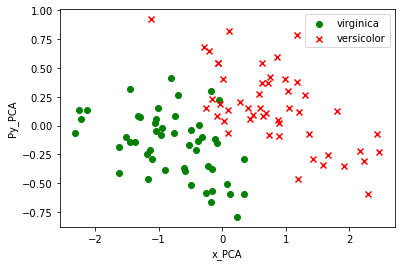

In [25]:
# Plot dos dados utilizando apenas a sepal_legnth, petal_length
plt.scatter(iris_PCA[iris_PCA['species'] == 'virginica']['x_PCA'], 
            iris_PCA[iris_PCA['species'] == 'virginica']['y_PCA'],
            color = 'green',
            marker = 'o',
            label = 'virginica')

plt.scatter(iris_PCA[iris_PCA['species'] == 'versicolor']['x_PCA'], 
            iris_PCA[iris_PCA['species'] == 'versicolor']['y_PCA'],
            color = 'red',
            marker = 'x',
            label = 'versicolor')

plt.xlabel('x_PCA')
plt.ylabel('Py_PCA')

plt.legend()
plt.show()

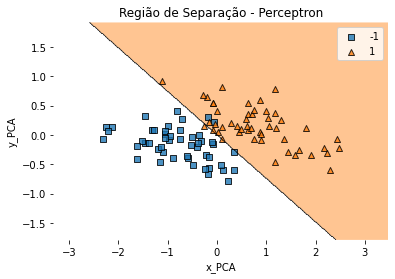

In [26]:
# Plot da região de separação
plot_decision_regions(X_pca, 
                      y, 
                      clf = model, 
                      legend = 2)
plt.xlabel('x_PCA')
plt.ylabel('y_PCA')
plt.title('Região de Separação - Perceptron')
plt.legend()
plt.show()